### Corrected and Improved Code (Cell 1: Setup)

This first cell now not only sets up the path for your `src` modules but also defines key directory variables (`DATA_DIR`, `ROOT_DIR`) that you can use throughout your notebook.


In [24]:
import sys
from pathlib import Path
import pandas as pd
import os
from IPython.display import display, Markdown  # Assuming you use these for display

# --- 1. PANDAS OPTIONS (No change) ---
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 3000)

# --- 2. IPYTHON AUTORELOAD (No change) ---
%load_ext autoreload
%autoreload 2
%matplotlib widget

# --- 3. ROBUST PATH CONFIGURATION (MODIFIED) ---

# Get the current working directory of the notebook
NOTEBOOK_DIR = Path.cwd()

# Find the project ROOT directory by going up from the notebook's location
# This is robust and works even if you move the notebook deeper.
ROOT_DIR = NOTEBOOK_DIR.parent.parent

# Define key project directories relative to the ROOT
DATA_DIR = ROOT_DIR / 'data'
SRC_DIR = ROOT_DIR / 'src'
# You could also define an output directory here if needed
OUTPUT_DIR = ROOT_DIR / 'output'

# Add the 'src' directory to the Python path so you can import 'utils'
if str(SRC_DIR) not in sys.path:
    sys.path.append(str(SRC_DIR))

# --- 4. VERIFICATION (IMPROVED) ---
print(f"✅ Project Root Directory: {ROOT_DIR}")
print(f"✅ Notebook Directory: {NOTEBOOK_DIR}")
print(f"✅ Source Directory (for utils): {SRC_DIR}")
print(f"✅ Data Directory (for input): {DATA_DIR}")

# Verify that the key directories exist. This helps catch path errors early.
assert ROOT_DIR.exists(), f"ROOT directory not found at: {ROOT_DIR}"
assert SRC_DIR.exists(), f"Source directory not found at: {SRC_DIR}"
assert DATA_DIR.exists(), f"Data directory not found at: {DATA_DIR}"

# --- 5. IMPORT YOUR CUSTOM MODULE ---
import utils
print("\n✅ Successfully imported 'utils' module.")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
✅ Project Root Directory: c:\Users\ping\Files_win10\python\py311\stocks
✅ Notebook Directory: c:\Users\ping\Files_win10\python\py311\stocks\notebooks_rank\_working
✅ Source Directory (for utils): c:\Users\ping\Files_win10\python\py311\stocks\src
✅ Data Directory (for input): c:\Users\ping\Files_win10\python\py311\stocks\data

✅ Successfully imported 'utils' module.


### Corrected Code (Cell 2: Execution)

Now, in your second cell, you simply use the `DATA_DIR` variable we defined in the setup cell. This removes the fragile relative path `..\data`.

In [25]:
# To get ALL matching files, sorted by recency
file_list = utils.get_recent_files(
    directory_path=DATA_DIR,
    extension='parquet',
    prefix=None,
    contains_pattern='df_finviz_merged_stocks_etfs',
    count=None
)

# Print the file_list
print(f'\nfile_list (len(file_list): {len(file_list)}:')
for i, f, in enumerate(file_list):
    print(f'{i}: {f}')



file_list (len(file_list): 54:
0: 2025-07-11_df_finviz_merged_stocks_etfs.parquet
1: 2025-07-10_df_finviz_merged_stocks_etfs.parquet
2: 2025-07-09_df_finviz_merged_stocks_etfs.parquet
3: 2025-07-08_df_finviz_merged_stocks_etfs.parquet
4: 2025-07-07_df_finviz_merged_stocks_etfs.parquet
5: 2025-07-03_df_finviz_merged_stocks_etfs.parquet
6: 2025-06-06_df_finviz_merged_stocks_etfs.parquet
7: 2025-06-05_df_finviz_merged_stocks_etfs.parquet
8: 2025-06-04_df_finviz_merged_stocks_etfs.parquet
9: 2025-06-03_df_finviz_merged_stocks_etfs.parquet
10: 2025-06-02_df_finviz_merged_stocks_etfs.parquet
11: 2025-05-30_df_finviz_merged_stocks_etfs.parquet
12: 2025-05-29_df_finviz_merged_stocks_etfs.parquet
13: 2025-05-28_df_finviz_merged_stocks_etfs.parquet
14: 2025-05-27_df_finviz_merged_stocks_etfs.parquet
15: 2025-05-23_df_finviz_merged_stocks_etfs.parquet
16: 2025-05-22_df_finviz_merged_stocks_etfs.parquet
17: 2025-05-21_df_finviz_merged_stocks_etfs.parquet
18: 2025-05-20_df_finviz_merged_stocks_etf

In [26]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

def create_rank_history_df(file_list, data_dir):
    """
    Reads daily files to compile a history of ranks for each ticker.

    Args:
        file_list (list): A list of sorted parquet filenames.
        data_dir (Path): The directory where files are stored.

    Returns:
        pd.DataFrame: A DataFrame with tickers as the index, dates as columns,
                      and ranks as the values. NaN indicates the ticker was not
                      present on that day.
    """
    daily_ranks_list = []
    for filename in file_list:
        # Extract the date string from the start of the filename
        date_str = filename.split('_')[0]
        
        # Read the daily data file
        df_daily = pd.read_parquet(data_dir / filename)
        
        # Extract the 'Rank' column (it's a Series with tickers as its index)
        ranks_series = df_daily['Rank']
        
        # Rename the Series to the date, which will become the column name
        ranks_series.name = pd.to_datetime(date_str)
        
        daily_ranks_list.append(ranks_series)

    # Concatenate all Series into a single DataFrame, aligning on the ticker index
    df_rank_history = pd.concat(daily_ranks_list, axis=1)
    
    # Sort columns by date just in case the file list wasn't perfectly sorted
    df_rank_history = df_rank_history.sort_index(axis=1)
    
    return df_rank_history

# --- Example Usage ---
# Assuming DATA_DIR is a pathlib.Path to your data folder
# and file_list is your list of filenames.
# DATA_DIR = Path('your_data_directory/')
df_rank_history = create_rank_history_df(file_list, DATA_DIR)

print("Shape of the resulting DataFrame:", df_rank_history.shape)
print(f'\ndf_rank_history:\n{df_rank_history}')

Shape of the resulting DataFrame: (1606, 54)

df_rank_history:
      2025-04-25  2025-04-28  2025-04-29  2025-04-30  2025-05-01  2025-05-02  2025-05-05  2025-05-06  2025-05-07  2025-05-08  2025-05-09  2025-05-12  2025-05-13  2025-05-14  2025-05-15  2025-05-16  2025-05-19  2025-05-20  2025-05-21  2025-05-22  2025-05-23  2025-05-27  2025-05-28  2025-05-29  2025-05-30  2025-06-02  2025-06-03  2025-06-04  2025-06-05  2025-06-06  2025-06-09  2025-06-10  2025-06-11  2025-06-12  2025-06-13  2025-06-16  2025-06-17  2025-06-18  2025-06-19  2025-06-20  2025-06-23  2025-06-24  2025-06-25  2025-06-26  2025-06-27  2025-06-30  2025-07-01  2025-07-02  2025-07-03  2025-07-07  2025-07-08  2025-07-09  2025-07-10  2025-07-11
NVDA         3.0         3.0         3.0         3.0         3.0         3.0         3.0         3.0         3.0         3.0         3.0         3.0         3.0         2.0         2.0         2.0         2.0         2.0         2.0         2.0         2.0         2.0         2.0    

# WOW keep this one
    df_rank_history,
    lookback_days=20,
    recent_days=4,
    min_lookback_rank_improvement=15,
    min_dip_magnitude=0,       # The dip must be at least 15 ranks deep
    min_reversal_improvement=0, # It must have recovered at least 5 ranks from the bottom
    # current_rank_bracket_start=601,
    current_rank_bracket_end=800,

In [27]:
import pandas as pd
import numpy as np

def find_rank_dip_or_reversal_opportunities(
                            df_rank_history, 
                            lookback_days=20, 
                            recent_days=4, 
                            min_lookback_rank_improvement=15,
                            # --- Mode-specific parameters ---
                            min_recent_rank_drop=None,  # Only used in 'dip' mode
                            min_dip_magnitude=None,  # Only used in 'reversal' mode 
                            min_reversal_improvement=None,  # Only used in 'reversal' mode
                            # --- General filters ---
                            current_rank_bracket_start=1, 
                            current_rank_bracket_end=None):
    """
    Scans rank history to find tickers that had a steady uptrend in rank
    followed by a recent significant drop, within a specified current rank range.

    Args:
        df_rank_history (pd.DataFrame): DataFrame with tickers as index, dates as columns, and ranks as values.
        lookback_days (int): The number of days to define the "past performance" period.
        recent_days (int): The number of recent days to check for a "dip".
        min_lookback_rank_improvement (int): The minimum number of ranks a ticker must have improved
                                     during the lookback period to be considered.
        min_recent_rank_drop (int): The minimum number of ranks a ticker must have dropped
                               in the recent period to be considered a "dip".
        current_rank_bracket_start (int): The minimum current rank to be included in the analysis. Defaults to 1.
        current_rank_bracket_end (int, optional): The maximum current rank to be included. If None, no upper limit.

    Returns:
        list: A sorted list of dictionaries, where each dictionary contains information
              about a potential "buy the dip" opportunity.
    """
    # --- Mode Detection and Parameter Validation ---
    mode = None
    
    is_dip_param_present = min_recent_rank_drop is not None
    are_reversal_params_present = min_dip_magnitude is not None or min_reversal_improvement is not None
    
    # Check for conflicting parameters (mixing modes)
    if is_dip_param_present and are_reversal_params_present:
        # Build a highly descriptive error message by separating arguments by mode
        dip_args_str = f"min_recent_rank_drop={min_recent_rank_drop}"
        
        reversal_args = []
        if min_dip_magnitude is not None:
            reversal_args.append(f"min_dip_magnitude={min_dip_magnitude}")
        if min_reversal_improvement is not None:
            reversal_args.append(f"min_reversal_improvement={min_reversal_improvement}")
        reversal_args_str = ", ".join(reversal_args)

        # The new, multi-line error message for maximum clarity
        error_message = (
            "Cannot mix modes. You provided parameters for both 'Dip' and 'Reversal' modes.\n"
            f"  - For 'Dip' mode, you provided: {dip_args_str}\n"
            f"  - For 'Reversal' mode, you provided: {reversal_args_str}\n"
            "Please choose one mode and provide only its required arguments."
        )
        raise ValueError(error_message)

    # Determine the mode (this logic remains the same)
    if is_dip_param_present:
        mode = 'dip'
        print("Running in 'Dip' mode...")
    elif min_dip_magnitude is not None and min_reversal_improvement is not None:
        mode = 'reversal'
        print("Running in 'Reversal' mode...")
    else:
        # The other error messages were already quite clear, but we'll keep them
        if are_reversal_params_present:
            provided = []
            if min_dip_magnitude is not None: provided.append(f"min_dip_magnitude={min_dip_magnitude}")
            if min_reversal_improvement is not None: provided.append(f"min_reversal_improvement={min_reversal_improvement}")
            raise ValueError(f"Incomplete 'Reversal' mode parameters. To use this mode, you must provide BOTH "
                             f"'min_dip_magnitude' and 'min_reversal_improvement'. "
                             f"You only provided: {', '.join(provided)}.")
        else:
            raise ValueError("Must specify parameters for a mode. For 'Dip' mode, provide 'min_recent_rank_drop'. "
                             "For 'Reversal' mode, provide both 'min_dip_magnitude' and 'min_reversal_improvement'.")

    # --- The rest of the function is unchanged ---
    
    # Guard Clause & Date Setup
    total_days_needed = lookback_days + recent_days
    if len(df_rank_history.columns) < total_days_needed:
        print(f"Error: Not enough data. Need {total_days_needed} days, have {len(df_rank_history.columns)}.")
        return []
        
    all_dates = df_rank_history.columns
    last_date = all_dates[-1]
    recent_period_start_date = all_dates[-recent_days]
    lookback_period_end_date = all_dates[-(recent_days + 1)]
    lookback_period_start_date = all_dates[-(recent_days + lookback_days)]
    lookback_dates = df_rank_history.loc[:, lookback_period_start_date:lookback_period_end_date].columns
    recent_dates = df_rank_history.loc[:, recent_period_start_date:last_date].columns

    opportunities = []

    # Pre-filter tickers by current rank
    ranks_on_last_day = df_rank_history[last_date]
    # Create boolean masks for the start and end ranks
    ## Vectorized comparison, compares every element in the ranks_on_last_day Series to
    ## the single value current_rank_bracket_start, returns True/False 
    mask_start = (ranks_on_last_day >= current_rank_bracket_start)
    if current_rank_bracket_end is not None:
        mask_end = (ranks_on_last_day <= current_rank_bracket_end)
        tickers_to_scan = df_rank_history[mask_start & mask_end].index
    else: # If no end rank is specified, only use the start mask        
        tickers_to_scan = df_rank_history[mask_start].index
        
    # Format dates for clean printing. Using pd.to_datetime is robust.
    analysis_start_str = pd.to_datetime(lookback_period_start_date).strftime('%Y-%m-%d')
    analysis_end_str = pd.to_datetime(last_date).strftime('%Y-%m-%d')
    
    print(f"Analyzing {len(tickers_to_scan)} tickers from {analysis_start_str} to {analysis_end_str}, "
          f"currently ranked between {current_rank_bracket_start} and {current_rank_bracket_end or 'max'}...")

    # Analysis Loop
    for ticker in tickers_to_scan:
        lookback_ranks = df_rank_history.loc[ticker, lookback_dates].dropna()
        recent_ranks = df_rank_history.loc[ticker, recent_dates].dropna()
        # Ensure lookback_ranks and recent_ranks have all the dates, otherwise jumps to next iteration
        if len(lookback_ranks) < lookback_days or len(recent_ranks) < recent_days: continue
        if (lookback_ranks.iloc[0] - lookback_ranks.iloc[-1]) < min_lookback_rank_improvement: continue

        ## Straight line fit, keep the slope, ignore the intercept        
        slope, _ = np.polyfit(np.arange(len(lookback_ranks)), lookback_ranks, 1)
        ## Skip tickers with with negative rank slope, the highest rank is 1        
        if slope >= 0: continue

        if mode == 'dip':
            rank_at_start_of_recent = recent_ranks.iloc[0]
            current_rank = recent_ranks.iloc[-1]
            recent_drop = current_rank - rank_at_start_of_recent
            if recent_drop < min_recent_rank_drop: continue
            opportunities.append({'ticker': ticker, 'current_rank': int(current_rank), 'previous_rank': int(rank_at_start_of_recent), 'recent_drop': int(recent_drop), 'lookback_slope': round(slope, 2)})
        elif mode == 'reversal':
            rank_at_start_of_recent = recent_ranks.iloc[0]
            current_rank = recent_ranks.iloc[-1]
            dip_rank = recent_ranks.max()
            dip_magnitude = dip_rank - rank_at_start_of_recent
            if dip_magnitude < min_dip_magnitude: continue
            reversal_improvement = dip_rank - current_rank
            if reversal_improvement < min_reversal_improvement: continue
            opportunities.append({'ticker': ticker, 'current_rank': int(current_rank), 'dip_rank': int(dip_rank), 'dip_magnitude': int(dip_magnitude), 'reversal_improvement': int(reversal_improvement), 'lookback_slope': round(slope, 2)})

    return sorted(opportunities, key=lambda x: x['lookback_slope'])

In [28]:
df_rank_history.iloc[:, :]

,2025-04-25,2025-04-28,2025-04-29,2025-04-30,2025-05-01,2025-05-02,2025-05-05,2025-05-06,2025-05-07,2025-05-08,2025-05-09,2025-05-12,2025-05-13,2025-05-14,2025-05-15,2025-05-16,2025-05-19,2025-05-20,2025-05-21,2025-05-22,2025-05-23,2025-05-27,2025-05-28,2025-05-29,2025-05-30,2025-06-02,2025-06-03,2025-06-04,2025-06-05,2025-06-06,2025-06-09,2025-06-10,2025-06-11,2025-06-12,2025-06-13,2025-06-16,2025-06-17,2025-06-18,2025-06-19,2025-06-20,2025-06-23,2025-06-24,2025-06-25,2025-06-26,2025-06-27,2025-06-30,2025-07-01,2025-07-02,2025-07-03,2025-07-07,2025-07-08,2025-07-09,2025-07-10,2025-07-11
NVDA,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
MSFT,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
AAPL,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
AMZN,4.0,4.0,4.0,4.0,4.0,4.0,6.0,6.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
GOOG,6.0,6.0,5.0,5.0,6.0,5.0,4.0,4.0,6.0,5.0,5.0,5.0,5.0,5.0,5.0,6.0,5.0,6.0,5.0,6.0,5.0,6.0,6.0,5.0,5.0,5.0,5.0,6.0,5.0,6.0,5.0,6.0,6.0,6.0,6.0,6.0,5.0,6.0,5.0,5.0,6.0,5.0,6.0,5.0,6.0,5.0,6.0,5.0,6.0,6.0,5.0,5.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GOLD,433.0,427.0,434.0,434.0,445.0,452.0,447.0,436.0,434.0,448.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ONTO,1336.0,1337.0,NaN,1368.0,1377.0,1347.0,1354.0,1366.0,1358.0,1359.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
UCON,1545.0,1545.0,1528.0,1550.0,1551.0,1554.0,1555.0,1557.0,1557.0,1558.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RECS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1544.0,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
selected_df = df_rank_history.iloc[:, :]       # Get all rows and all columns
# selected_df = df_rank_history.iloc[:, :50]   # Get the first 50 columns 
# selected_df = df_rank_history.iloc[:, -50:]  # Get the last 50 columns 
# selected_df = df_rank_history.iloc[:, :-1]   # Get all columns except the last one

print(f'df_rank_history.shape: {df_rank_history.shape}')
print(f"selected_df.shape:     {selected_df.shape}")

df_rank_history.shape: (1606, 54)
selected_df.shape:     (1606, 54)


In [38]:
lookback_days = 20 
recent_days = 4 
min_lookback_rank_improvement = 15
# --- Mode-specific parameters ---
min_recent_rank_drop = None  # Only used in 'dip' mode
# === Reversal Mode Parameters ===
min_dip_magnitude = 0  # Only used in 'reversal' mode 
min_reversal_improvement = 2  # Only used in 'reversal' mode
# --- General filters ---
current_rank_bracket_start = 1 
current_rank_bracket_end = 1000

In [39]:
rank_candidates = find_rank_dip_or_reversal_opportunities(
    selected_df,
    lookback_days=lookback_days,
    recent_days=recent_days,
    min_lookback_rank_improvement=min_lookback_rank_improvement,
    # === Dip Mode Parameter ===
    min_recent_rank_drop=min_recent_rank_drop,  # <-- This activates 'Dip' mode
    # === Reversal Mode Parameters ===
    min_dip_magnitude=min_dip_magnitude,       # <-- This...
    min_reversal_improvement=min_reversal_improvement, # <-- ...and this activate 'Reversal' mode
    # === Current Rank Bracket-Filters ===    
    current_rank_bracket_start=current_rank_bracket_start,
    current_rank_bracket_end=current_rank_bracket_end,
)


Running in 'Reversal' mode...
Analyzing 985 tickers from 2025-06-09 to 2025-07-11, currently ranked between 1 and 1000...


In [40]:
import pprint

# Define a fixed width for the left part of the log statements to ensure alignment.
# This makes it easy to adjust the spacing for all lines at once.
log_width = 35

print(f"\nFound {len(rank_candidates)} rank candidates.")
print(f'\nFilter criteria:')
print(f"- lookback_days: {lookback_days}")
print(f"- recent_days: {recent_days}")
print(f"- min_lookback_rank_improvement: {min_lookback_rank_improvement}")

# --- Aligned section starts here ---
# Create the text for each line that needs special formatting.
line_dip = f"- min_recent_rank_drop: {min_recent_rank_drop}"
line_mag = f"- min_dip_magnitude: {min_dip_magnitude}"
line_rev = f"- min_reversal_improvement: {min_reversal_improvement}"

# Use f-string's left-alignment (<) to pad each line to the same width.
print(f"{line_dip:<{log_width}}# Only used in 'Dip' mode")
print(f"{line_mag:<{log_width}}# Only used in 'Reversal' mode")
print(f"{line_rev:<{log_width}}# Only used in 'Reversal' mode")
# --- Aligned section ends here ---

print(f"- current_rank_bracket_start: {current_rank_bracket_start}")
print(f"- current_rank_bracket_end: {current_rank_bracket_end}")

# Use pprint for a more readable list of dictionaries output.
print(f'\nrank_candidates:')
pprint.pprint(rank_candidates)


Found 133 rank candidates.

Filter criteria:
- lookback_days: 20
- recent_days: 4
- min_lookback_rank_improvement: 15
- min_recent_rank_drop: None       # Only used in 'Dip' mode
- min_dip_magnitude: 0             # Only used in 'Reversal' mode
- min_reversal_improvement: 2      # Only used in 'Reversal' mode
- current_rank_bracket_start: 1
- current_rank_bracket_end: 1000

rank_candidates:
[{'current_rank': 905,
  'dip_magnitude': 1,
  'dip_rank': 976,
  'lookback_slope': -11.79,
  'reversal_improvement': 71,
  'ticker': 'AVAV'},
 {'current_rank': 519,
  'dip_magnitude': 0,
  'dip_rank': 528,
  'lookback_slope': -11.2,
  'reversal_improvement': 9,
  'ticker': 'SYM'},
 {'current_rank': 809,
  'dip_magnitude': 32,
  'dip_rank': 843,
  'lookback_slope': -9.22,
  'reversal_improvement': 34,
  'ticker': 'ASTS'},
 {'current_rank': 757,
  'dip_magnitude': 0,
  'dip_rank': 781,
  'lookback_slope': -8.12,
  'reversal_improvement': 24,
  'ticker': 'CRDO'},
 {'current_rank': 594,
  'dip_magnitu

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mplcursors
from adjustText import adjust_text
from matplotlib.widgets import CheckButtons, Button

# It's good practice to close any existing plots before creating a new one
plt.close('all')

def plot_rank_changes_for_tickers(df_rank_history, ticker_list, title_suffix="", 
                                  exclude_tickers=None, figure_height=8, figure_width=12):
    """
    Plots rank history with interactive controls.
    This version uses a unified dictionary to manage artists for robustness.

    Args:
        df_rank_history (pd.DataFrame): The full rank history data.
        ticker_list (list): The specific tickers to plot.
        title_suffix (str, optional): Text to add to the plot title.
        exclude_tickers (list, optional): A list of tickers to manually remove.
        figure_height (int, optional): The exact height of the plot in inches. Defaults to 10.
        figure_width (int, optional): The exact width of the plot in inches. Defaults to 12.
    """

    # --- Data Filtering ---
    df_to_plot = df_rank_history.loc[ticker_list]
    if exclude_tickers:
        tickers_to_remove = [t for t in exclude_tickers if t in df_to_plot.index]
        if tickers_to_remove:
            print(f"Manually excluding {len(tickers_to_remove)} tickers: {tickers_to_remove}")
            df_to_plot = df_to_plot.drop(labels=tickers_to_remove)
    if df_to_plot.empty:
        return
        
    sns.set_style("whitegrid")
    fig, ax = plt.subplots(figsize=(figure_width, figure_height))
    
    plot_left_margin, plot_right_margin = 0.07, 0.85
    plot_top_margin, plot_bottom_margin = 0.92, 0.1
    fig.subplots_adjust(left=plot_left_margin, right=plot_right_margin, top=plot_top_margin, bottom=plot_bottom_margin)
    
    # --- Plotting and Artist Collection ---
    lines, text_objects = [], {}
    for ticker, data in df_to_plot.iterrows():
        line, = ax.plot(data.index, data.values, marker='.', markersize=4, label=ticker)
        lines.append(line)
    
    initial_texts = []
    for ticker, data in df_to_plot.iterrows():
        last_valid_idx = data.last_valid_index()
        if last_valid_idx is not None:
            last_rank = data[last_valid_idx]
            text = ax.text(last_valid_idx, last_rank, ticker, fontsize=9)
            initial_texts.append(text)
            text_objects[ticker] = text
    
    # Let adjust_text modify the text objects and add arrow_patch attributes
    adjust_text(initial_texts, ax=ax, force_text=(0.1, 0.25), arrowprops=dict(arrowstyle='-', color='gray', lw=0.5))
    
    # Collect the arrow patches that were added by adjust_text
    arrow_objects = {}
    for text in initial_texts:
        ticker = text.get_text()
        if hasattr(text, 'arrow_patch') and text.arrow_patch is not None:
            arrow_objects[ticker] = text.arrow_patch

    # --- Cursors and Plot Styling ---
    cursor = mplcursors.cursor(ax.lines, hover=True)
    @cursor.connect("add")
    def on_add(sel):
        sel.annotation.set_text(f'Ticker: {sel.artist.get_label()}\nRank: {sel.target[1]:.0f}')
        sel.annotation.get_bbox_patch().set(facecolor='lightblue', alpha=0.7)
        sel.annotation.arrow_patch.set(arrowstyle="->", facecolor="black", alpha=0.5)

    ax.invert_yaxis()
    ax.set_title(f'Rank Movement for {title_suffix}' if title_suffix else 'Rank Movement', fontsize=16)
    ax.set_xlabel('Date', fontsize=12)
    ax.set_ylabel('Rank (Lower is Better)', fontsize=12)
    
    start_date, last_date = df_to_plot.columns.min(), df_to_plot.columns.max()
    padding = (last_date - start_date) * 0.08
    ax.set_xlim(right=last_date + padding)

    # --- WIDGETS SECTION ---
    widget_left, widget_width = 0.87, 0.12
    button_height, button_spacing = 0.04, 0.01
    clear_button_bottom = plot_bottom_margin 
    reset_button_bottom = clear_button_bottom + button_height + button_spacing
    checkbox_area_bottom = reset_button_bottom + button_height + button_spacing
    checkbox_area_top = plot_top_margin
    checkbox_area_height = checkbox_area_top - checkbox_area_bottom

    rax = plt.axes([widget_left, checkbox_area_bottom, widget_width, checkbox_area_height])
    labels = [line.get_label() for line in lines]
    visibility = [line.get_visible() for line in lines]
    check = CheckButtons(rax, labels, visibility)
    
    # ### THE SINGLE SOURCE OF TRUTH FOR VISIBILITY ###
    def toggle_lines(label):
        # Find the index of the label that was clicked
        idx = labels.index(label)
        
        # Get the new visibility state (the opposite of the current line's state)
        is_visible = not lines[idx].get_visible()
        
        # Set visibility for all three artist types
        lines[idx].set_visible(is_visible)
        
        if label in text_objects:
            text_objects[label].set_visible(is_visible)
            
        if label in arrow_objects:
            arrow_objects[label].set_visible(is_visible)
            
        plt.draw()
    
    check.on_clicked(toggle_lines)
    
    # --- BUTTONS (Simple Triggers) ---
    reset_ax = plt.axes([widget_left, reset_button_bottom, widget_width, button_height])
    reset_button = Button(reset_ax, 'Reset All', color='lightgray', hovercolor='0.975')
    
    def reset_all(event):
        # This function just "clicks" any box that is off
        for i in range(len(labels)):
            if not check.get_status()[i]:
                check.set_active(i)
    reset_button.on_clicked(reset_all)

    clear_ax = plt.axes([widget_left, clear_button_bottom, widget_width, button_height])
    clear_button = Button(clear_ax, 'Clear All', color='lightgray', hovercolor='0.975')

    def clear_all(event):
        # This function just "clicks" any box that is on
        for i in range(len(labels)):
            if check.get_status()[i]:
                check.set_active(i)
    clear_button.on_clicked(clear_all)

    # Return all widgets to prevent garbage collection
    return check, reset_button, clear_button

Found 133 potential reversal opportunities:
    ticker  current_rank  dip_rank  dip_magnitude  reversal_improvement  lookback_slope
0     AVAV           905       976              1                    71          -11.79
1      SYM           519       528              0                     9          -11.20
2     ASTS           809       843             32                    34           -9.22
3     CRDO           757       781              0                    24           -8.12
4     SOFI           594       621              0                    27           -7.00
..     ...           ...       ...            ...                   ...             ...
128    IWY           857       863              4                     6           -0.23
129    PSX           303       307              0                     4           -0.22
130    KGC           691       711              2                    20           -0.19
131   ICLR           948       950              6                     2     

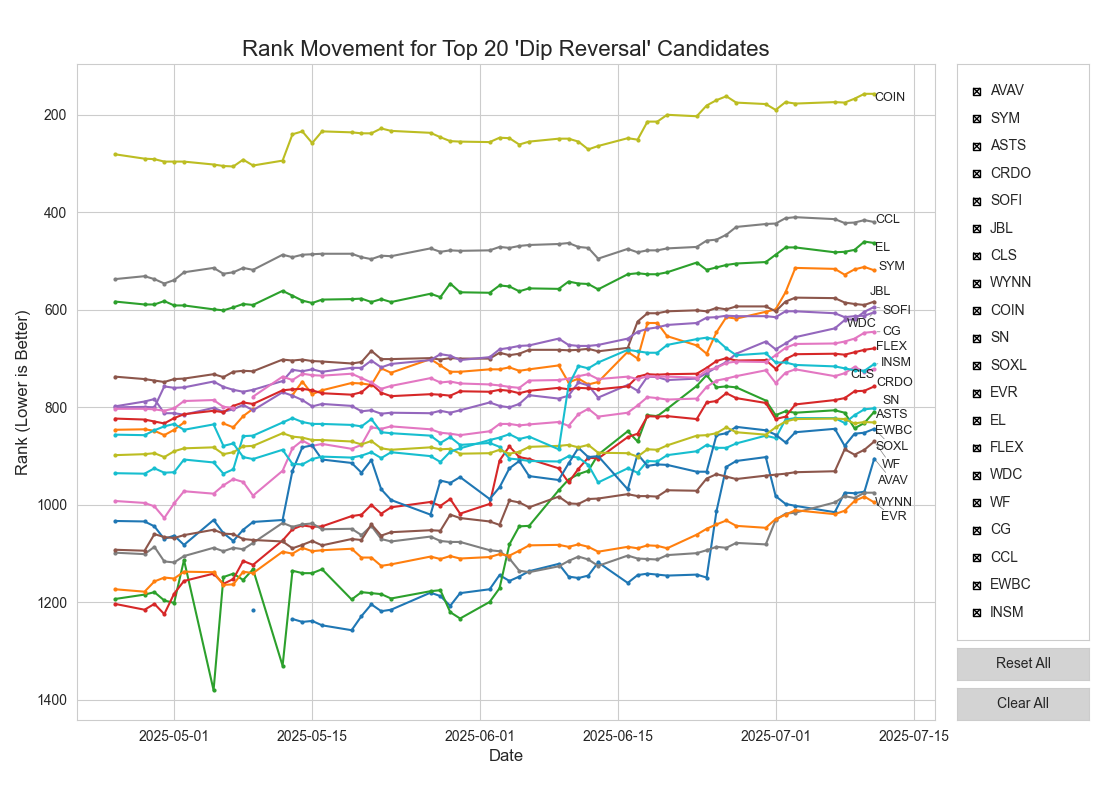

In [42]:
# --- Display and Plot the Results ---
if rank_candidates:
    df_reversals = pd.DataFrame(rank_candidates)
    print(f"Found {len(df_reversals)} potential reversal opportunities:")
    print(df_reversals)

    # Plot the top candidates using your plotting function
    tickers_to_plot = df_reversals.head(50)['ticker'].tolist()
    
    noisy_tickers = ['']

    interactive_widgets = plot_rank_changes_for_tickers(
        selected_df, 
        ticker_list=tickers_to_plot[0:20],
        title_suffix="Top 20 'Dip Reversal' Candidates",
        exclude_tickers=noisy_tickers, # Add the new argument here
        figure_height=8,  # Optional: cap the height to prevent excessive size
        figure_width=11,  # Reduced from 18 to 16, a more common size for notebooks
    )
else:
    print("No tickers matched the specified reversal criteria.")